In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from os import path, walk, listdir
from pprint import pprint
from datetime import datetime

In [2]:
BASE_DIR = ".\data"
fundamentals_path = path.join(BASE_DIR, "fundamentals")
price_path = path.join(BASE_DIR, 'daily_price')
company = 'A'

In [3]:
print(fundamentals_path)
print(price_path)

.\data\fundamentals
.\data\daily_price


In [32]:
df_income = pd.read_csv(path.join(fundamentals_path, company, "A_income_statements_wide.csv"))
df_income.start_date = pd.to_datetime(df_income.start_date, format='%Y-%m-%d')
df_income.end_date = pd.to_datetime(df_income.end_date, format='%Y-%m-%d')
df_income.filing_date = pd.to_datetime(df_income.filing_date, format='%Y-%m-%d')

df_balance = pd.read_csv(path.join(fundamentals_path, company, "A_balance_sheets_wide.csv"))
df_balance.start_date = pd.to_datetime(df_balance.start_date, format='%Y-%m-%d')
df_balance.end_date = pd.to_datetime(df_balance.end_date, format='%Y-%m-%d')
df_balance.filing_date = pd.to_datetime(df_balance.filing_date, format='%Y-%m-%d')

df_cashflow = pd.read_csv(path.join(fundamentals_path, company, "A_cashflows_wide.csv"))
df_cashflow.start_date = pd.to_datetime(df_cashflow.start_date, format='%Y-%m-%d')
df_cashflow.end_date = pd.to_datetime(df_cashflow.end_date, format='%Y-%m-%d')
df_cashflow.filing_date = pd.to_datetime(df_cashflow.filing_date, format='%Y-%m-%d')

df_price = pd.read_csv(path.join(price_path, f'{company}_US_daily_price.csv'))
df_price.date = pd.to_datetime(df_price.date, format='%Y-%m-%d')

In [33]:
df_income.head()

,company_name,company_ticker,company_lei,company_cik,year,quarter,start_date,end_date,filing_date,basicdilutedeps,...,totalinterestexpense,totalinterestincome,totaloperatingexpenses,totaloperatingincome,totalotherincome,totalpretaxincome,totalrevenue,weightedavebasicdilutedsharesos,weightedavebasicsharesos,weightedavedilutedsharesos
0,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2007.0,FY,2006-11-01,2007-10-31,2009-12-21 16:38:45+00:00,1.62,...,91000000.0,172000000.0,2.385000e+09,584000000.0,86000000.0,670000000.0,5.420000e+09,393800000.0,394000000.0,406000000.0
1,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2008.0,FY,2007-11-01,2008-10-31,2010-12-17 19:41:22+00:00,1.91,...,123000000.0,113000000.0,2.401000e+09,795000000.0,20000000.0,815000000.0,5.774000e+09,362800000.0,363000000.0,371000000.0
2,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2008.0,Q3,2008-05-01,2008-07-31,2009-10-05 13:16:45+00:00,0.47,...,31000000.0,23000000.0,5.850000e+08,218000000.0,-3000000.0,215000000.0,1.444000e+09,359600000.0,362000000.0,372000000.0
3,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2009.0,Q4,2009-08-01,2009-10-31,NaT,0.08,...,21000000.0,4000000.0,5.630000e+08,71000000.0,8000000.0,79000000.0,1.167000e+09,344400000.0,346000000.0,346000000.0
4,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2009.0,FY,2008-11-01,2009-10-31,2011-12-16 16:51:36+00:00,-0.09,...,88000000.0,29000000.0,2.245000e+09,47000000.0,-40000000.0,7000000.0,4.481000e+09,344400000.0,346000000.0,346000000.0


In [34]:
pprint(df_income.drop(columns=['company_name', 'company_ticker', 'company_lei', 'company_cik', 'year', 'quarter', 'start_date', 'end_date', 'filing_date']).columns)

Index(['basicdilutedeps', 'basiceps', 'cashdividendspershare', 'dilutedeps',
       'incometaxexpense', 'netincome', 'netincomecontinuing',
       'netincomediscontinued', 'netincometocommon', 'operatingcostofrevenue',
       'operatingrevenue', 'othergains', 'otherincome', 'rdexpense',
       'sgaexpense', 'totalcostofrevenue', 'totalgrossprofit',
       'totalinterestexpense', 'totalinterestincome', 'totaloperatingexpenses',
       'totaloperatingincome', 'totalotherincome', 'totalpretaxincome',
       'totalrevenue', 'weightedavebasicdilutedsharesos',
       'weightedavebasicsharesos', 'weightedavedilutedsharesos'],
      dtype='object')


In [35]:
df_balance.head()

,company_name,company_ticker,company_lei,company_cik,year,quarter,start_date,end_date,filing_date,accountspayable,...,totalcurrentassets,totalcurrentliabilities,totalequity,totalequityandnoncontrollinginterests,totalliabilities,totalliabilitiesandequity,totalnoncurrentassets,totalnoncurrentliabilities,totalpreferredequity,treasurystock
0,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2008.0,FY,NaT,2008-10-31,2009-10-05 13:16:45+00:00,308000000.0,...,3.182000e+09,1.330000e+09,2.559000e+09,2.559000e+09,4.448000e+09,7.007000e+09,3.001000e+09,3.118000e+09,0.0,-7.470000e+09
1,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2009.0,FY,NaT,2009-10-31,2010-12-17 19:41:22+00:00,307000000.0,...,3.961000e+09,1.123000e+09,2.506000e+09,2.514000e+09,5.098000e+09,7.612000e+09,2.806000e+09,3.975000e+09,0.0,-7.627000e+09
2,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2009.0,Q3,NaT,2009-07-31,2009-10-05 13:16:45+00:00,250000000.0,...,2.897000e+09,9.910000e+08,2.489000e+09,2.489000e+09,4.084000e+09,6.573000e+09,2.837000e+09,3.093000e+09,0.0,-7.627000e+09
3,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2010.0,FY,NaT,2010-10-31,2011-12-16 16:51:36+00:00,499000000.0,...,6.169000e+09,3.083000e+09,3.228000e+09,3.236000e+09,6.460000e+09,9.696000e+09,2.547000e+09,3.377000e+09,0.0,-8.038000e+09
4,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2010.0,Q3,NaT,2010-07-31,2010-10-06 12:54:48+00:00,459000000.0,...,5.735000e+09,2.917000e+09,2.802000e+09,2.810000e+09,6.290000e+09,9.100000e+09,2.408000e+09,3.373000e+09,0.0,-7.986000e+09


In [36]:
pprint(df_balance.drop(columns=['company_name', 'company_ticker', 'company_lei', 'company_cik', 'year', 'quarter', 'start_date', 'end_date', 'filing_date']).columns)

Index(['accountspayable', 'accountsreceivable', 'accruedexpenses', 'aoci',
       'cashandequivalents', 'commitmentsandcontingencies', 'commonequity',
       'currentdeferredrevenue', 'currentdeferredtaxliabilities',
       'currentemployeebenefitliabilities', 'goodwill', 'intangibleassets',
       'longtermdebt', 'longterminvestments', 'netinventory', 'netppe',
       'noncontrollinginterests', 'noncurrentemployeebenefitliabilities',
       'othercurrentassets', 'othercurrentliabilities',
       'othercurrentnonoperatingassets', 'othercurrentnonoperatingliabilities',
       'otherequity', 'othernoncurrentassets', 'othernoncurrentliabilities',
       'othernoncurrentnonoperatingassets',
       'othernoncurrentnonoperatingliabilities', 'restrictedcash',
       'retainedearnings', 'shorttermdebt', 'shortterminvestments',
       'totalassets', 'totalcommonequity', 'totalcurrentassets',
       'totalcurrentliabilities', 'totalequity',
       'totalequityandnoncontrollinginterests', 'totall

In [37]:
df_cashflow.head()

,company_name,company_ticker,company_lei,company_cik,year,quarter,start_date,end_date,filing_date,acquisitions,...,otherfinancingactivitiesnet,otherinvestingactivitiesnet,othernetchangesincash,paymentofdividends,purchaseofinvestments,purchaseofplantpropertyandequipment,repaymentofdebt,repurchaseofcommonequity,saleofinvestments,saleofplantpropertyandequipment
0,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2007.0,FY,2006-11-01,2007-10-31,2009-12-21 16:38:45+00:00,-344000000.0,...,NaN,3000000.0,NaN,NaN,0.0,-154000000.0,-9000000.0,-1.944000e+09,13000000.0,12000000.0
1,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2008.0,FY,2007-11-01,2008-10-31,2009-12-21 16:38:45+00:00,-172000000.0,...,0.0,33000000.0,NaN,NaN,-256000000.0,-154000000.0,-510000000.0,-1.001000e+09,150000000.0,NaN
2,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2009.0,Q4,2009-08-01,2009-10-31,NaT,-12000000.0,...,NaN,29000000.0,68000000.0,NaN,51000000.0,-128000000.0,-5000000.0,NaN,64000000.0,-97000000.0
3,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2009.0,FY,2008-11-01,2009-10-31,2011-12-16 16:51:36+00:00,-12000000.0,...,NaN,16000000.0,NaN,NaN,-30000000.0,-128000000.0,-330000000.0,-1.570000e+08,94000000.0,1000000.0
4,Agilent Technologies Inc,A,QUIX8Y7A2WP0XRMW7G29,1090872,2009.0,Q3,2009-05-01,2009-07-31,NaT,2000000.0,...,NaN,-23000000.0,-68000000.0,NaN,-51000000.0,68000000.0,NaN,NaN,-32000000.0,98000000.0


In [38]:
pprint(df_cashflow.drop(columns=['company_name', 'company_ticker', 'company_lei', 'company_cik', 'year', 'quarter', 'start_date', 'end_date', 'filing_date']).columns)

Index(['acquisitions', 'amortizationexpense', 'cashincometaxespaid',
       'cashinterestpaid', 'depreciationexpense', 'divestitures',
       'effectofexchangeratechanges', 'increasedecreaseinoperatingcapital',
       'issuanceofcommonequity', 'issuanceofdebt',
       'netcashfromcontinuingfinancingactivities',
       'netcashfromcontinuinginvestingactivities',
       'netcashfromcontinuingoperatingactivities',
       'netcashfromfinancingactivities', 'netcashfrominvestingactivities',
       'netcashfromoperatingactivities', 'netchangeincash', 'netincome',
       'netincomecontinuing', 'noncashadjustmentstonetincome',
       'otherfinancingactivitiesnet', 'otherinvestingactivitiesnet',
       'othernetchangesincash', 'paymentofdividends', 'purchaseofinvestments',
       'purchaseofplantpropertyandequipment', 'repaymentofdebt',
       'repurchaseofcommonequity', 'saleofinvestments',
       'saleofplantpropertyandequipment'],
      dtype='object')


In [39]:
df_price.head()

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume
0,1999-12-31,False,daily,79.50,79.94,76.25,77.31,1381400.0,52.926210,53.219135,50.762560,51.468243,1381400.0
1,1999-12-30,False,daily,76.00,80.00,74.25,79.25,4771900.0,50.596125,53.259079,49.431083,52.759775,4771900.0
2,1999-12-29,False,daily,63.00,79.06,62.94,72.00,7524000.0,41.941525,52.633285,41.901581,47.933171,7524000.0
3,1999-12-28,False,daily,54.25,61.50,53.94,61.50,2546500.0,36.116313,40.942917,35.909934,40.942917,2546500.0
4,1999-12-27,False,daily,49.94,53.19,49.56,52.81,1451800.0,33.246980,35.410630,32.994000,35.157650,1451800.0


In [40]:
df_price.head()

,date,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume
0,1999-12-31,False,daily,79.50,79.94,76.25,77.31,1381400.0,52.926210,53.219135,50.762560,51.468243,1381400.0
1,1999-12-30,False,daily,76.00,80.00,74.25,79.25,4771900.0,50.596125,53.259079,49.431083,52.759775,4771900.0
2,1999-12-29,False,daily,63.00,79.06,62.94,72.00,7524000.0,41.941525,52.633285,41.901581,47.933171,7524000.0
3,1999-12-28,False,daily,54.25,61.50,53.94,61.50,2546500.0,36.116313,40.942917,35.909934,40.942917,2546500.0
4,1999-12-27,False,daily,49.94,53.19,49.56,52.81,1451800.0,33.246980,35.410630,32.994000,35.157650,1451800.0


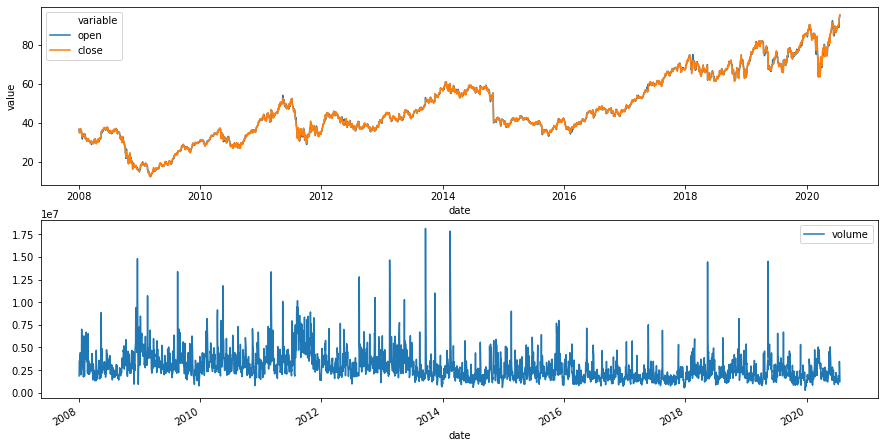

In [74]:
df_price_filtered = df_price.loc[df_price.date >= pd.Timestamp(2008,1,1),:]
df_price_filtered = df_price_filtered.sort_values(by=['date'])
#plt.figure(figsize=(15,8))
figs, axes = plt.subplots(figsize=(15,8), nrows=2, ncols=1)
sns.lineplot(x='date', y='value', hue='variable', ax=axes[0], data=pd.melt(df_price_filtered.loc[:,['date', 'open', 'close']], ['date']))
df_price_filtered.plot(x="date", y="volume", ax=axes[1])
#ax.figure.legend()
plt.show()

#sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(df_price_filtered.loc[:,['date', 'open', 'volume']], ['date']))
#sns.lineplot(x=df_price_filtered.date, y=df_price_filtered.volume)
#sns.lineplot(x=df_income.end_date, y=df_income.basiceps)